In [2]:
import pandas as pd 
import numpy as np 

df = pd.read_csv('feature_selected_dataset.csv')
print(df.head(5))
print(df.info())

      Sex  Age          Fault         PolicyType      VehiclePrice  RepNumber  \
0  Female   21  Policy Holder  Sport - Liability  more than 69,000         12   
1    Male   34  Policy Holder  Sport - Collision  more than 69,000         15   
2    Male   47  Policy Holder  Sport - Collision  more than 69,000          7   
3    Male   65    Third Party  Sedan - Liability  20,000 to 29,000          4   
4  Female   27    Third Party  Sport - Collision  more than 69,000          3   

   Deductible  DriverRating PastNumberOfClaims AgeOfVehicle AgeOfPolicyHolder  \
0         300             1               none      3 years          26 to 30   
1         400             4               none      6 years          31 to 35   
2         400             3                  1      7 years          41 to 50   
3         400             2                  1  more than 7          51 to 65   
4         400             1               none      5 years          31 to 35   

  PoliceReportFiled Witnes

In [3]:
print(df.isnull().sum())

Sex                   0
Age                   0
Fault                 0
PolicyType            0
VehiclePrice          0
RepNumber             0
Deductible            0
DriverRating          0
PastNumberOfClaims    0
AgeOfVehicle          0
AgeOfPolicyHolder     0
PoliceReportFiled     0
WitnessPresent        0
AgentType             0
BasePolicy            0
FraudFound            0
dtype: int64


In [4]:
df = df.drop('FraudFound', axis=1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Sex                 15420 non-null  object
 1   Age                 15420 non-null  int64 
 2   Fault               15420 non-null  object
 3   PolicyType          15420 non-null  object
 4   VehiclePrice        15420 non-null  object
 5   RepNumber           15420 non-null  int64 
 6   Deductible          15420 non-null  int64 
 7   DriverRating        15420 non-null  int64 
 8   PastNumberOfClaims  15420 non-null  object
 9   AgeOfVehicle        15420 non-null  object
 10  AgeOfPolicyHolder   15420 non-null  object
 11  PoliceReportFiled   15420 non-null  object
 12  WitnessPresent      15420 non-null  object
 13  AgentType           15420 non-null  object
 14  BasePolicy          15420 non-null  object
dtypes: int64(4), object(11)
memory usage: 1.8+ MB
None


In [11]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).info()
categorical_columns = df.select_dtypes(include=['object']).info()

print("Numerical Columns: ", numeric_columns)
print("Categorical Columns: ", categorical_columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Age           15420 non-null  int64
 1   RepNumber     15420 non-null  int64
 2   Deductible    15420 non-null  int64
 3   DriverRating  15420 non-null  int64
dtypes: int64(4)
memory usage: 482.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Sex                 15420 non-null  object
 1   Fault               15420 non-null  object
 2   PolicyType          15420 non-null  object
 3   VehiclePrice        15420 non-null  object
 4   PastNumberOfClaims  15420 non-null  object
 5   AgeOfVehicle        15420 non-null  object
 6   AgeOfPolicyHolder   15420 non-null  object
 7   PoliceReportFiled   15420 non-null  object
 8   WitnessPrese

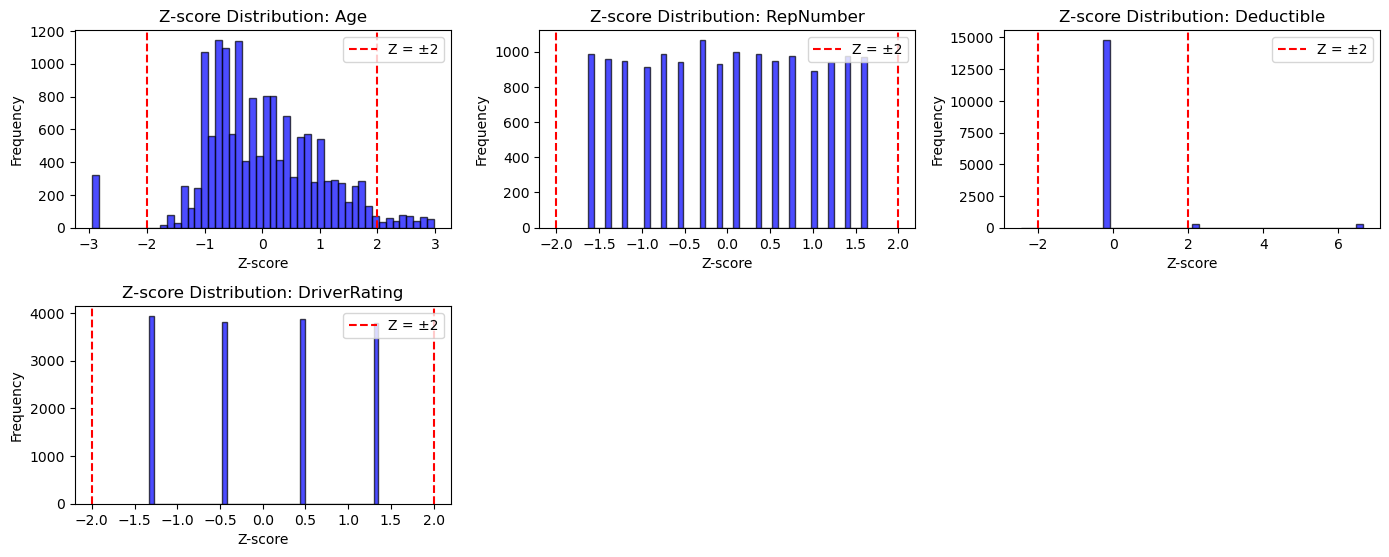

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler 

df = pd.read_csv('feature_selected_dataset.csv')
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
scaler = StandardScaler()
df_zscore = pd.DataFrame(scaler.fit_transform(df[numeric_columns]), columns=numeric_columns)

plt.figure(figsize=(14, 8))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)  
    plt.hist(df_zscore[column], bins=50, alpha=0.7, color='blue', edgecolor='black')
    plt.axvline(x=2, color='red', linestyle='dashed', label='Z = ±2')
    plt.axvline(x=-2, color='red', linestyle='dashed')
    plt.title(f"Z-score Distribution: {column}")
    plt.xlabel("Z-score")
    plt.ylabel("Frequency")
    plt.legend()

plt.tight_layout()
plt.show()

In [21]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(df[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))
df = pd.concat([df, one_hot_df], axis=1)
df = df.drop(categorical_columns, axis=1)
print(df.head(5))

   Age  RepNumber  Deductible  DriverRating  Sex_Female  Sex_Male  \
0   21         12         300             1         1.0       0.0   
1   34         15         400             4         0.0       1.0   
2   47          7         400             3         0.0       1.0   
3   65          4         400             2         0.0       1.0   
4   27          3         400             1         1.0       0.0   

   Fault_Policy Holder  Fault_Third Party  PolicyType_Sedan - All Perils  \
0                  1.0                0.0                            0.0   
1                  1.0                0.0                            0.0   
2                  1.0                0.0                            0.0   
3                  0.0                1.0                            0.0   
4                  0.0                1.0                            0.0   

   PolicyType_Sedan - Collision  ...  PoliceReportFiled_Yes  \
0                           0.0  ...                    0.0   
1 

In [22]:
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

min_max_scaler = MinMaxScaler(feature_range=(0, 1)) 
df[numeric_columns] = min_max_scaler.fit_transform(df[numeric_columns])
df.to_csv("standardized_minmax.csv", index=False)
